<a href="https://colab.research.google.com/github/texaschikkita/7333QTW/blob/main/mushroomsBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Load the iris dataset (a classic classification problem)
iris = datasets.load_iris()
X, y = iris.data, iris.target  # Features and target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Naïve Bayes classifier (GaussianNB is suitable for continuous data)
nb_classifier = GaussianNB()

# Train the model
nb_classifier.fit(X_train, y_train)

# Predict on test data
y_pred = nb_classifier.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)


Accuracy: 0.98
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [22]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB

# Load the iris dataset (classification problem)
iris = datasets.load_iris()
X, y = iris.data, iris.target  # Features and target

# Use Stratified K-Fold Cross-Validation (ensures balanced class distribution)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Naïve Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation and get accuracy scores
cv_scores = cross_val_score(nb_classifier, X, y, cv=kfold, scoring='accuracy')

# Print the results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.2f}")
print(f"Standard Deviation: {cv_scores.std():.2f}")


Cross-Validation Scores: [0.96666667 0.96666667 0.9        1.         0.9       ]
Mean Accuracy: 0.95
Standard Deviation: 0.04


In [23]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB

# Load the iris dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target  # Features and target

# Initialize Naïve Bayes classifier
nb_classifier = GaussianNB()

# Use Stratified K-Fold cross-validation to maintain class balance
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and compute accuracy scores
cv_scores = cross_val_score(nb_classifier, X, y, cv=cv, scoring='accuracy')

# Display results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores):.2f}")
print(f"Standard Deviation: {np.std(cv_scores):.2f}")


Cross-Validation Accuracy Scores: [0.96666667 0.96666667 0.9        1.         0.9       ]
Mean Accuracy: 0.95
Standard Deviation: 0.04


In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.datasets import fetch_openml

# Load Mushroom dataset (categorical dataset)
data = fetch_openml(name="mushroom", version=1, as_frame=True)
df = data.frame

# Separate features and target
X = df.drop(columns=['class'])  # Features (all categorical)
y = df['class']  # Target ('e' for edible, 'p' for poisonous)

# Handle missing values by replacing them with the most frequent category
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = imputer.fit_transform(X)

# Convert categorical features to numerical using Ordinal Encoding
encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(X_imputed)

# Define Naïve Bayes classifier for categorical data
nb_classifier = CategoricalNB()

# Use Stratified K-Fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and compute accuracy scores
cv_scores = cross_val_score(nb_classifier, X_encoded, y, cv=cv, scoring='accuracy')

# Display results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores):.2f}")
print(f"Standard Deviation: {np.std(cv_scores):.2f}")


Cross-Validation Accuracy Scores: [0.95015385 0.96061538 0.95630769 0.93969231 0.95812808]
Mean Accuracy: 0.95
Standard Deviation: 0.01


In [25]:
# Fit the Naïve Bayes model on the full dataset
nb_classifier.fit(X_encoded, y)

# Check class probabilities (log scale)
print("Class Log Prior Probabilities (Log Scale):")
print(nb_classifier.class_log_prior_)

# Check feature probabilities (log scale)
print("\nFeature Log Probabilities (Log Scale):")
print(nb_classifier.feature_log_prob_)


Class Log Prior Probabilities (Log Scale):
[-0.65783517 -0.72975192]

Feature Log Probabilities (Log Scale):
[array([[-2.34228053, -8.34616759, -0.97028545, -2.91244559, -4.84966003,
        -0.77109589],
       [-4.38253671, -6.66491909, -0.92384083, -1.87576207, -8.27435701,
        -0.83069332]]), array([[-0.99261095, -8.34569287, -1.30253296, -1.0291447 ],
       [-1.63921357, -6.66440902, -1.02037655, -0.81163199]]), array([[-4.45529606, -4.8506088 , -1.90936471, -1.40689389, -1.20428896,
        -4.30406509, -5.51390302, -5.51390302, -1.76647722, -2.35315493],
       [-3.47958583, -5.71042702, -1.49886938, -1.57957746, -1.34683856,
        -3.78674001, -8.27537637, -8.27537637, -2.50393525, -1.76363105]]), array([[-1.06108312, -0.42477142],
       [-0.17378232, -1.83558495]]), array([[-2.35291783, -8.34687925, -8.34687925, -2.35291783, -8.34687925,
        -0.21270498, -8.34687925, -8.34687925, -8.34687925],
       [-8.27512163, -3.01243144, -0.59679527, -8.27512163, -4.66420372,

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_scores = cross_val_score(dt_classifier, X_encoded, y, cv=cv, scoring='accuracy')

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_scores = cross_val_score(rf_classifier, X_encoded, y, cv=cv, scoring='accuracy')

print(f"\nDecision Tree Mean Accuracy: {np.mean(dt_scores):.2f}")
print(f"Random Forest Mean Accuracy: {np.mean(rf_scores):.2f}")



Decision Tree Mean Accuracy: 1.00
Random Forest Mean Accuracy: 1.00


In [27]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {'alpha': np.linspace(0.1, 1.0, 10)}

# Perform grid search
grid_search = GridSearchCV(CategoricalNB(), param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_encoded, y)

print("Best alpha:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)


Best alpha: {'alpha': 0.1}
Best cross-validated accuracy: 0.9793213338385751


In [28]:
from sklearn.metrics import confusion_matrix

# Fit the model on full dataset and predict
nb_classifier.fit(X_encoded, y)
y_pred = nb_classifier.predict(X_encoded)

# Confusion Matrix
conf_matrix = confusion_matrix(y, y_pred)

print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[4177   31]
 [ 325 3591]]


In [29]:
np.exp(nb_classifier.class_log_prior_)


array([0.51797144, 0.48202856])

In [30]:
print("Feature Probabilities Structure:")
for i, feature_probs in enumerate(nb_classifier.feature_log_prob_):
    print(f"Class {i}: {len(feature_probs)} feature distributions")


Feature Probabilities Structure:
Class 0: 2 feature distributions
Class 1: 2 feature distributions
Class 2: 2 feature distributions
Class 3: 2 feature distributions
Class 4: 2 feature distributions
Class 5: 2 feature distributions
Class 6: 2 feature distributions
Class 7: 2 feature distributions
Class 8: 2 feature distributions
Class 9: 2 feature distributions
Class 10: 2 feature distributions
Class 11: 2 feature distributions
Class 12: 2 feature distributions
Class 13: 2 feature distributions
Class 14: 2 feature distributions
Class 15: 2 feature distributions
Class 16: 2 feature distributions
Class 17: 2 feature distributions
Class 18: 2 feature distributions
Class 19: 2 feature distributions
Class 20: 2 feature distributions
Class 21: 2 feature distributions


In [31]:
for class_index, class_probs in enumerate(nb_classifier.feature_log_prob_):
    print(f"\nClass {class_index} Probabilities:")

    for feature_index, feature_values in enumerate(class_probs):
        print(f"  Feature {feature_index}: Probabilities = {np.exp(feature_values)}")



Class 0 Probabilities:
  Feature 0: Probabilities = [9.61082107e-02 2.37304224e-04 3.78974846e-01 5.43426673e-02
 7.83103939e-03 4.62505933e-01]
  Feature 1: Probabilities = [1.24936257e-02 1.27485977e-03 3.96991331e-01 1.53238144e-01
 2.54971953e-04 4.35747068e-01]

Class 1 Probabilities:
  Feature 0: Probabilities = [3.70607787e-01 2.37416904e-04 2.71842355e-01 3.57312441e-01]
  Feature 1: Probabilities = [0.19413265 0.00127551 0.36045918 0.44413265]

Class 2 Probabilities:
  Feature 0: Probabilities = [0.01161688 0.00782361 0.14817449 0.2449028  0.29990517 0.01351351
 0.00403035 0.00403035 0.17093409 0.09506875]
  Feature 1: Probabilities = [3.08201732e-02 3.31125828e-03 2.23382578e-01 2.06062150e-01
 2.60061131e-01 2.26693836e-02 2.54712175e-04 2.54712175e-04
 8.17626083e-02 1.71421294e-01]

Class 3 Probabilities:
  Feature 0: Probabilities = [0.34608076 0.65391924]
  Feature 1: Probabilities = [0.84047984 0.15952016]

Class 4 Probabilities:
  Feature 0: Probabilities = [9.5091297

In [32]:
!pip install ace_tools

In [34]:
import pandas as pd

# Extract feature probabilities into a structured DataFrame
feature_probs = []
for class_index, class_probs in enumerate(nb_classifier.feature_log_prob_):
    for feature_index, feature_values in enumerate(class_probs):
        feature_probs.append({
            "Class": class_index,
            "Feature Index": feature_index,
            "Probabilities": np.exp(feature_values)
        })

# Convert to DataFrame and display
feature_df = pd.DataFrame(feature_probs)
# Instead of using ace_tools, we'll just display the DataFrame using pandas' display function
display(feature_df)
# or print the first few rows:
# print(feature_df.head())

,Class,Feature Index,Probabilities
0,0,0,"[0.0961082107261509, 0.0002373042240151875, 0...."
1,0,1,"[0.012493625701172873, 0.0012748597654258032, ..."
2,1,0,"[0.3706077872744543, 0.00023741690408357092, 0..."
3,1,1,"[0.19413265306122457, 0.001275510204081633, 0...."
4,2,0,"[0.011616880037932667, 0.007823613086770974, 0..."
5,2,1,"[0.030820173204279155, 0.0033112582781456923, ..."
6,3,0,"[0.34608076009501154, 0.6539192399049873]"
7,3,1,"[0.8404798366513525, 0.1595201633486473]"
8,4,0,"[0.09509129713066168, 0.0002371354043158645, 0..."
9,4,1,"[0.0002547770700636943, 0.049171974522293, 0.5..."


In [35]:
import pandas as pd

# Convert probabilities to a DataFrame and print
feature_df = pd.DataFrame(feature_probs)
print(feature_df)


    Class  Feature Index                                      Probabilities
0       0              0  [0.0961082107261509, 0.0002373042240151875, 0....
1       0              1  [0.012493625701172873, 0.0012748597654258032, ...
2       1              0  [0.3706077872744543, 0.00023741690408357092, 0...
3       1              1  [0.19413265306122457, 0.001275510204081633, 0....
4       2              0  [0.011616880037932667, 0.007823613086770974, 0...
5       2              1  [0.030820173204279155, 0.0033112582781456923, ...
6       3              0          [0.34608076009501154, 0.6539192399049873]
7       3              1           [0.8404798366513525, 0.1595201633486473]
8       4              0  [0.09509129713066168, 0.0002371354043158645, 0...
9       4              1  [0.0002547770700636943, 0.049171974522293, 0.5...
10      5              0          [0.04584323040380044, 0.9541567695961995]
11      5              1          [0.004849412965798878, 0.995150587034202]
12      6   

In [36]:
print("Feature DataFrame Columns:", feature_df.columns)


Feature DataFrame Columns: Index(['Class', 'Feature Index', 'Probabilities'], dtype='object')


In [37]:
for index, row in feature_df.iterrows():
    edible_probs = np.array(row.get("Probabilities", []))  # Use .get() to avoid KeyError

    if len(edible_probs) > 1:  # Avoid single-value features
        max_edible = np.max(edible_probs)
        min_edible = np.min(edible_probs)

        # Check if a feature has a strong class distinction
        if max_edible > threshold and min_edible < (1 - threshold):
            discriminative_features.append((row["Feature Index"], max_edible, min_edible))


In [20]:
print(feature_df.head())  # Show first few rows


          0         1         2         3         4         5         6
0 -0.806846 -1.095769 -2.861608 -2.797329 -3.426424 -3.771694 -3.083715
1 -1.128627 -1.666611 -1.889418 -4.663694 -1.357897 -2.665140 -8.274612


In [38]:
# Identify features where one class has a high probability while the other has a low probability
discriminative_features = []
threshold = 0.9  # Set threshold for strong classification features

for index, row in feature_df.iterrows():
    edible_probs = np.array(row["Probabilities"])

    if len(edible_probs) > 1:  # Avoid single-value features
        max_edible = np.max(edible_probs)
        min_edible = np.min(edible_probs)

        # Check if a feature has a strong class distinction
        if max_edible > threshold and min_edible < (1 - threshold):
            discriminative_features.append((row["Feature Index"], max_edible, min_edible))

# Display features with strong class separation
print("Strongly Discriminative Features (Edible vs. Poisonous):")
for feature_index, max_prob, min_prob in discriminative_features:
    print(f"Feature {feature_index}: Max Probability = {max_prob:.2f}, Min Probability = {min_prob:.2f}")


Strongly Discriminative Features (Edible vs. Poisonous):
Feature 0: Max Probability = 0.95, Min Probability = 0.05
Feature 1: Max Probability = 1.00, Min Probability = 0.00
Feature 1: Max Probability = 0.97, Min Probability = 0.03
Feature 0: Max Probability = 0.93, Min Probability = 0.07
Feature 1: Max Probability = 0.92, Min Probability = 0.00
Feature 0: Max Probability = 0.95, Min Probability = 0.00
Feature 1: Max Probability = 1.00, Min Probability = 0.00
Feature 1: Max Probability = 0.97, Min Probability = 0.01


In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_scores = cross_val_score(dt_classifier, X_encoded, y, cv=5, scoring='accuracy')

print(f"\nDecision Tree Mean Accuracy: {np.mean(dt_scores):.2f}")



Decision Tree Mean Accuracy: 0.91


In [40]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_scores = cross_val_score(rf_classifier, X_encoded, y, cv=5, scoring='accuracy')

print(f"\nRandom Forest Mean Accuracy: {np.mean(rf_scores):.2f}")



Random Forest Mean Accuracy: 0.89


In [41]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X_encoded):
    X_train, X_test = X_encoded[train_index], X_encoded[test_index]

    print(f"Train Shape: {X_train.shape}, Test Shape: {X_test.shape}")


Train Shape: (6499, 22), Test Shape: (1625, 22)
Train Shape: (6499, 22), Test Shape: (1625, 22)
Train Shape: (6499, 22), Test Shape: (1625, 22)
Train Shape: (6499, 22), Test Shape: (1625, 22)
Train Shape: (6500, 22), Test Shape: (1624, 22)


In [42]:
import numpy as np

for train_index, test_index in kf.split(X_encoded):
    X_train, X_test = X_encoded[train_index], X_encoded[test_index]

    # Count unique values per feature
    train_uniques = [np.unique(X_train[:, i]).size for i in range(X_train.shape[1])]
    test_uniques = [np.unique(X_test[:, i]).size for i in range(X_test.shape[1])]

    print(f"Unique Categories in Train: {train_uniques}")
    print(f"Unique Categories in Test:  {test_uniques}")
    print("-" * 50)


Unique Categories in Train: [6, 4, 10, 2, 9, 2, 2, 2, 12, 2, 4, 4, 4, 9, 9, 1, 4, 3, 5, 9, 6, 7]
Unique Categories in Test:  [6, 4, 10, 2, 9, 2, 2, 2, 12, 2, 4, 4, 4, 9, 9, 1, 4, 3, 5, 9, 6, 7]
--------------------------------------------------
Unique Categories in Train: [6, 4, 10, 2, 9, 2, 2, 2, 12, 2, 4, 4, 4, 9, 9, 1, 4, 3, 5, 9, 6, 7]
Unique Categories in Test:  [5, 4, 10, 2, 9, 2, 2, 2, 12, 2, 4, 4, 4, 9, 9, 1, 4, 3, 5, 9, 6, 7]
--------------------------------------------------
Unique Categories in Train: [6, 4, 10, 2, 9, 2, 2, 2, 12, 2, 4, 4, 4, 9, 9, 1, 4, 3, 5, 9, 6, 7]
Unique Categories in Test:  [6, 3, 10, 2, 9, 2, 2, 2, 12, 2, 4, 4, 4, 9, 9, 1, 4, 3, 5, 9, 6, 7]
--------------------------------------------------
Unique Categories in Train: [6, 4, 10, 2, 9, 2, 2, 2, 12, 2, 4, 4, 4, 9, 9, 1, 4, 3, 5, 9, 6, 7]
Unique Categories in Test:  [6, 4, 10, 2, 9, 2, 2, 2, 12, 2, 4, 4, 4, 9, 9, 1, 4, 3, 5, 9, 6, 7]
--------------------------------------------------
Unique Categories in

In [43]:
nb_classifier = CategoricalNB(alpha=1.0)  # Ensures all categories are accounted for


In [44]:
nb_classifier.fit(X_encoded, y)  # Train on full dataset
y_pred = nb_classifier.predict(X_encoded)  # Predict on same dataset

print("Prediction Success! No IndexError.")


Prediction Success! No IndexError.


In [46]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Predict on full dataset
y_pred = nb_classifier.predict(X_encoded)

# Accuracy
accuracy = accuracy_score(y, y_pred)
print(f"Naïve Bayes Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y, y_pred)
conf_df = pd.DataFrame(conf_matrix, index=["Edible (Actual)", "Poisonous (Actual)"],
                        columns=["Edible (Predicted)", "Poisonous (Predicted)"])

# Instead of using ace_tools, display the DataFrame using pandas' display function
display(conf_df)
# Or print the DataFrame:
# print(conf_df)

Naïve Bayes Accuracy: 0.96

Classification Report:
              precision    recall  f1-score   support

           e       0.93      0.99      0.96      4208
           p       0.99      0.92      0.95      3916

    accuracy                           0.96      8124
   macro avg       0.96      0.95      0.96      8124
weighted avg       0.96      0.96      0.96      8124



,Edible (Predicted),Poisonous (Predicted)
Edible (Actual),4177,31
Poisonous (Actual),325,3591


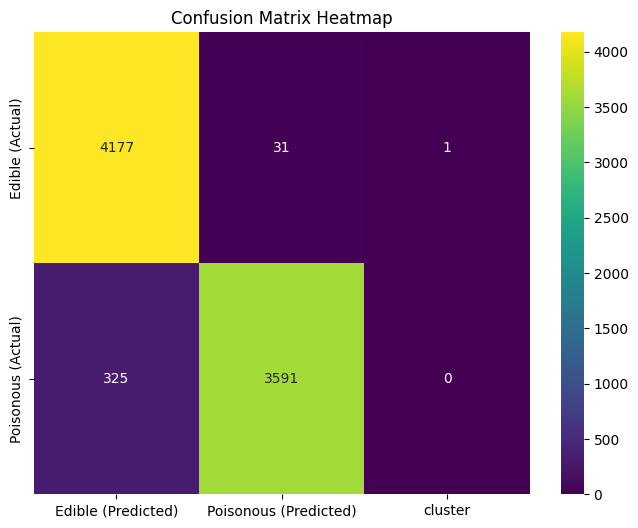

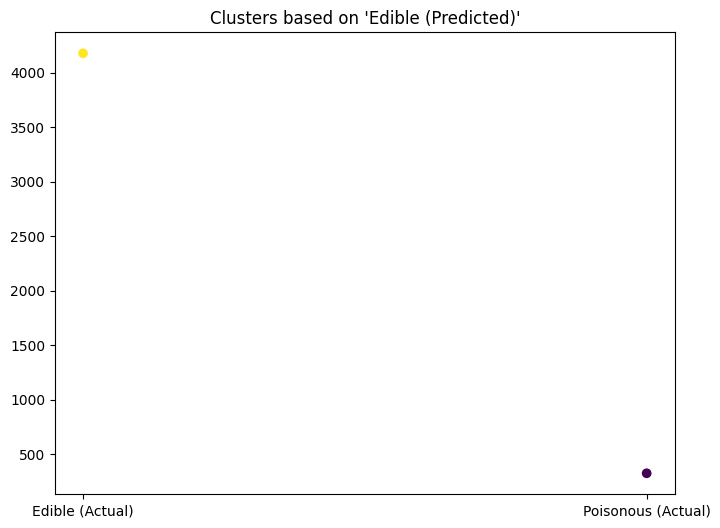

In [53]:
#  Using dataframe conf_df: heatmap and clustering

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_df, annot=True, fmt="d", cmap="viridis")
plt.title("Confusion Matrix Heatmap")
plt.show()

# Perform KMeans clustering (example with 2 clusters)
kmeans = KMeans(n_clusters=2, random_state=0)
conf_df['cluster'] = kmeans.fit_predict(conf_df)

# Visualize the clusters (example scatter plot)
plt.figure(figsize=(8, 6))
plt.scatter(conf_df.index, conf_df['Edible (Predicted)'], c=conf_df['cluster'])
plt.title("Clusters based on 'Edible (Predicted)'")
plt.show()


In [54]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define a pipeline that includes imputation, encoding, and Naïve Bayes
nb_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False)),  # Prevent missing category issues
    ("classifier", CategoricalNB())
])

# Define hyperparameter grid for Laplace smoothing (alpha)
param_grid = {'classifier__alpha': np.linspace(0.1, 1.0, 10)}

# Use StratifiedKFold for consistent class distribution across folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Run GridSearchCV with cross-validation
grid_search = GridSearchCV(nb_pipeline, param_grid, cv=cv, scoring="accuracy")
grid_search.fit(X, y)  # Use raw X (pipeline handles preprocessing)

# Print results
print("Best alpha:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)


Best alpha: {'classifier__alpha': 0.1}
Best cross-validated accuracy: 0.9540879878741947


In [56]:
import numpy as np

# Find misclassified indices
misclassified_indices = np.where(y != y_pred)[0]

# Show a sample of misclassified instances
misclassified_samples = pd.DataFrame(X_encoded[misclassified_indices], columns=data.feature_names)
misclassified_samples["True Label"] = y[misclassified_indices]
misclassified_samples["Predicted Label"] = y_pred[misclassified_indices]

# Display misclassified samples
display(misclassified_samples)

# tools.display_dataframe_to_user(name="Misclassified Samples", dataframe=misclassified_samples)


,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,True Label,Predicted Label
0,5.0,2.0,4.0,1.0,6.0,1.0,0.0,1.0,4.0,0.0,...,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0,p,e
1,5.0,3.0,8.0,1.0,6.0,1.0,0.0,1.0,5.0,0.0,...,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0,NaN,e
2,5.0,3.0,8.0,1.0,6.0,1.0,0.0,1.0,7.0,0.0,...,7.0,0.0,2.0,1.0,4.0,2.0,4.0,1.0,NaN,e
3,5.0,2.0,4.0,1.0,6.0,1.0,0.0,1.0,5.0,0.0,...,7.0,0.0,2.0,1.0,4.0,2.0,3.0,1.0,p,e
4,5.0,3.0,8.0,1.0,6.0,1.0,0.0,1.0,5.0,0.0,...,7.0,0.0,2.0,1.0,4.0,3.0,3.0,5.0,NaN,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,5.0,2.0,4.0,0.0,5.0,1.0,0.0,0.0,10.0,0.0,...,4.0,0.0,2.0,2.0,4.0,7.0,5.0,4.0,NaN,p
352,3.0,2.0,4.0,0.0,5.0,1.0,0.0,0.0,10.0,0.0,...,4.0,0.0,2.0,2.0,4.0,7.0,5.0,4.0,NaN,p
353,2.0,3.0,4.0,0.0,5.0,1.0,0.0,0.0,10.0,0.0,...,4.0,0.0,2.0,2.0,4.0,7.0,5.0,4.0,NaN,p
354,2.0,2.0,4.0,0.0,5.0,1.0,0.0,0.0,10.0,0.0,...,4.0,0.0,2.0,2.0,4.0,7.0,5.0,4.0,NaN,p


In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_scores = cross_val_score(dt_classifier, X_encoded, y, cv=5, scoring="accuracy")

print(f"\nDecision Tree Mean Accuracy: {np.mean(dt_scores):.2f}")



Decision Tree Mean Accuracy: 0.91


In [58]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_scores = cross_val_score(rf_classifier, X_encoded, y, cv=5, scoring="accuracy")

print(f"\nRandom Forest Mean Accuracy: {np.mean(rf_scores):.2f}")



Random Forest Mean Accuracy: 0.89


In [60]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define a pipeline with OneHotEncoding and Naïve Bayes
nb_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),  # Handles missing values
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False)),  # Prevents unseen category errors
    ("classifier", CategoricalNB())  # Naïve Bayes classifier
])

# Define hyperparameter grid for Laplace smoothing (alpha)
param_grid = {'classifier__alpha': np.linspace(0.1, 1.0, 10)}

# Use StratifiedKFold for balanced class distribution across folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Run GridSearchCV with cross-validation
grid_search = GridSearchCV(nb_pipeline, param_grid, cv=cv, scoring="accuracy")
grid_search.fit(X, y)  # Use raw X (pipeline handles encoding)

# Print best parameters and score
print("Best alpha:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)


Best alpha: {'classifier__alpha': 0.1}
Best cross-validated accuracy: 0.9540879878741947


In [48]:

# from sklearn.tree import DecisionTreeClassifier

# dt_classifier = DecisionTreeClassifier(random_state=42)
# dt_scores = cross_val_score(dt_classifier, X_encoded, y, cv=cv, scoring='accuracy')

# print(f"\nDecision Tree Mean Accuracy: {np.mean(dt_scores):.2f}")






# import numpy as np

# # Convert log probabilities to actual probabilities
# feature_probabilities = np.exp(nb_classifier.feature_log_prob_)

# # Find most discriminative features by comparing probability distributions
# for i, feature in enumerate(data.feature_names):
#     print(f"Feature: {feature}")
#     print(f"Edible Probabilities: {feature_probabilities[0][i]}")
#     print(f"Poisonous Probabilities: {feature_probabilities[1][i]}")
#     print("-" * 50)

# from sklearn.ensemble import RandomForestClassifier

# rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_scores = cross_val_score(rf_classifier, X_encoded, y, cv=cv, scoring='accuracy')

# print(f"\nRandom Forest Mean Accuracy: {np.mean(rf_scores):.2f}")



# from sklearn.preprocessing import OneHotEncoder

# ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
# X_onehot = ohe.fit


# from sklearn.feature_selection import mutual_info_classif

# feature_importance = mutual_info_classif(X_encoded, y)
# for feature, importance in zip(data.feature_names, feature_importance):
#     print(f"{feature}: {importance:.3f}")



# from sklearn.model_selection import GridSearchCV

# param_grid = {'alpha': np.linspace(0.1, 1.0, 10)}
# grid_search = GridSearchCV(CategoricalNB(), param_grid, cv=cv, scoring='accuracy')
# grid_search.fit(X_encoded, y)

# print("Best alpha:", grid_search.best_params_)
# print("Best cross-validated accuracy:", grid_search.best_score_)


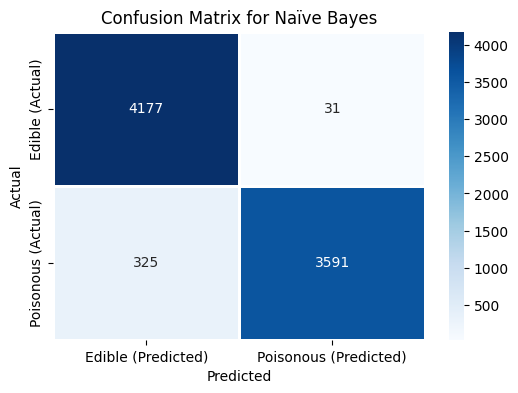

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Confusion Matrix
conf_matrix = confusion_matrix(y, y_pred)
conf_df = pd.DataFrame(conf_matrix,
                        index=["Edible (Actual)", "Poisonous (Actual)"],
                        columns=["Edible (Predicted)", "Poisonous (Predicted)"])

# Display as a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(conf_df, annot=True, fmt="d", cmap="Blues", linewidths=1)
plt.title("Confusion Matrix for Naïve Bayes")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


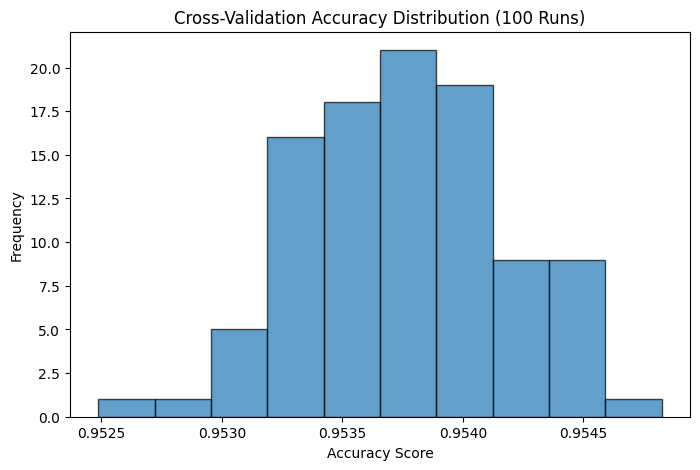

Mean Accuracy: 0.954
Standard Deviation: 0.000
Max Accuracy: 0.955
Min Accuracy: 0.952


In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, train_test_split, cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import CategoricalNB

# Define Naïve Bayes model
nb_model = CategoricalNB(alpha=1.0)

# Store accuracy scores
scores = []

# Repeat the process 100 times with different random states
for i in range(100):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=i)

    # Perform K-Fold Cross-Validation
    kf = KFold(n_splits=5, shuffle=True, random_state=i)

    # Fit model and predict using cross-validation
    y_pred = cross_val_predict(nb_model, X_encoded, y, cv=kf)

    # Compute accuracy
    score = accuracy_score(y, y_pred)
    scores.append(score)

# Plot histogram of accuracy scores
plt.figure(figsize=(8,5))
plt.hist(scores, bins=10, edgecolor='black', alpha=0.7)
plt.xlabel("Accuracy Score")
plt.ylabel("Frequency")
plt.title("Cross-Validation Accuracy Distribution (100 Runs)")
plt.show()

# Display summary statistics
print(f"Mean Accuracy: {np.mean(scores):.3f}")
print(f"Standard Deviation: {np.std(scores):.3f}")
print(f"Max Accuracy: {np.max(scores):.3f}")
print(f"Min Accuracy: {np.min(scores):.3f}")


In [71]:
import email

# Define file path (update with your actual file path)
mail = "/content/sample_data/S00067.23813c5ac6ce66fd892ee5501fd5dbd2"

# Open and parse the email
with open(mail, "r", encoding="utf-8") as f:
    msg = email.message_from_file(f)

# Walk through email parts and extract text content
for part in msg.walk():
    if part.get_content_type() == "text/plain":  # Extract plain text parts
        payload = part.get_payload(decode=True)
        charset = part.get_content_charset() or 'utf-8'  # Use 'utf-8' if charset is None
        print(payload.decode(charset, errors="ignore"))

In [72]:
import email

# Define file path (update with your actual file path)
mail = "/content/sample_data/S00067.23813c5ac6ce66fd892ee5501fd5dbd2"

# Open and parse the email
with open(mail, "r", encoding="utf-8") as f:
    msg = email.message_from_file(f)

# Walk through email parts and extract text content
for part in msg.walk():
    if part.get_content_type() == "text/plain":  # Extract plain text parts
        encoding = part.get_content_charset()  # Get the encoding type

        if encoding is None:  # If encoding is missing, use a default
            encoding = "utf-8"

        print(part.get_payload(decode=True).decode(encoding, errors="ignore"))


In [73]:
print(msg.keys())  # Lists all email headers


[]


In [74]:
print("Subject:", msg["Subject"])
print("From:", msg["From"])
print("To:", msg["To"])


Subject: None
From: None
To: None


In [75]:
import email

# Define file path (update with actual file path)
mail = "/content/sample_data/S00067.23813c5ac6ce66fd892ee5501fd5dbd2"

# Open and parse the email
with open(mail, "r", encoding="utf-8") as f:
    msg = email.message_from_file(f)

# Print email headers (to check if the email is correctly loaded)
print("=== Email Headers ===")
print(msg.keys())

# Walk through email parts and print content types
print("\n=== Email Parts ===")
for part in msg.walk():
    print(f"Content Type: {part.get_content_type()}")

# Extract text content (plain text or HTML)
print("\n=== Extracted Email Content ===")
for part in msg.walk():
    content_type = part.get_content_type()

    if content_type in ["text/plain", "text/html"]:  # Extract plain text or HTML
        encoding = part.get_content_charset() or "utf-8"  # Default to utf-8 if None
        content = part.get_payload(decode=True).decode(encoding, errors="ignore")

        print(f"\n--- Content ({content_type}) ---")
        print(content)


=== Email Headers ===
[]

=== Email Parts ===
Content Type: text/plain

=== Extracted Email Content ===

--- Content (text/plain) ---



In [76]:
import os
print(os.path.exists(mail))  # Should print True


True


In [ ]:
# cluster is feasture not a separate method